# Project #15: Twitter hate speech detection 2

## 1. Introduction


The goal of our project is to find efficient methods for identifying hate speech on twitter. Our aim is to find a set of features that could be used to identify hate speech content.

For our analysis, we have gathered two data sets. The first data set was collected by searching for tweets containing specific hashtags (topics). The second data set was collected from active twitter users that frequently posted hate speech content. Both data sets were obtained using Twitter API and the search-tweets pytho library.

Full source code and data sets are available at: https://github.com/tokuosma/NLP2019


In [1]:
# Standard libraries
import sys; sys.path.insert(0, '..') # add parent folder to path

#3rd. party
import pandas as pd
import matplotlib.pyplot as plt
import emojis 
import numpy as np

# Custom scripts
import liwc_empath
import util

# Dictionary keys
CATEGORY_HATE = "hate_speech"
CATEGORY_NON_HATE = "non_hate_speech"
ENTITY_HATE = "hate_speech"
ENTITY_NON_HATE = "non_hate_speech"

font = {'family' : 'normal',        
        'size'   : 12}



## 2. Data sets

### Data-set 1: Hate speech hash tags
The first data set was collected by searching for tweets containing specific hashtags that were provided to us in the project assignment. The hash tags were: #terrorist, #radicalist, #islamophobia, #extremist, and #bombing. 


In [2]:
# Read labeled tweets with specific hash tags
tweets_hashtag = {}
tweets_hashtag["bombing"] = util.read_tweets(["../Data/tweets_bombing_labeled.json"])
tweets_hashtag["extremist"] = util.read_tweets(["../Data/tweets_extremist_labeled.json"])
tweets_hashtag["islamophobia"] = util.read_tweets(["../Data/tweets_islamophobia_labeled.json"])
tweets_hashtag["radicalist"] = util.read_tweets(["../Data/tweets_radicalist_labeled.json"])
tweets_hashtag["terrorist"] = util.read_tweets(["../Data/tweets_terrorist_labeled.json"])

print('Hashtag summaries: ')
for key in tweets_hashtag.keys():
    util.print_hashtag_summary(key, tweets_hashtag[key])

# Read the combined labeled data set
labeled_tweets = util.read_tweets(["../Data/tweets_labeled_combined.json"])

num_hate = len([x for x in labeled_tweets if x['hate_speech']])
num_non_hate = len([x for x in labeled_tweets if not x['hate_speech']])

print('All labeled tweets: Number of hate speech = {0:d}, Number of non-hate speech = {1:d}'.format(num_hate, num_non_hate))


Hashtag summaries: 
#bombing: Number of hate speech = 2, Number of non hate speech = 195, Total number of tweets = 197
Oldest tweet date: 2019-11-23
Newest tweet date: 2019-12-13


#extremist: Number of hate speech = 6, Number of non hate speech = 368, Total number of tweets = 374
Oldest tweet date: 2019-11-13
Newest tweet date: 2019-12-13


#islamophobia: Number of hate speech = 12, Number of non hate speech = 158, Total number of tweets = 170
Oldest tweet date: 2019-12-12
Newest tweet date: 2019-12-13


#radicalist: Number of hate speech = 0, Number of non hate speech = 13, Total number of tweets = 13
Oldest tweet date: 2019-11-14
Newest tweet date: 2019-12-13


#terrorist: Number of hate speech = 117, Number of non hate speech = 334, Total number of tweets = 451
Oldest tweet date: 2019-12-11
Newest tweet date: 2019-12-13


All labeled tweets: Number of hate speech = 137, Number of non-hate speech = 1068


## 3. Characterization of the labeled data set

### 3.1 Sentiment analysis
For sentiment analysis we were tasked with plotting the percentage of polarity for both annotated hate speech post and annotated non-hate speech post. Comparing results from two different sentiment analyzers. We chose Textblob and Vader toolkits in python for using in our analysis. Both of these tools give out sentiment score values between -1 and 1 and because we had to split our post based on negative, neutral and positive we choose values as following: negative (-1 – (-0,333…)), neutral (-0,333… - 0,333…) and positive (0,333… - 1).  Analysis was performed so that every tweet that we had was cleaned so that only the text part of tweets remained, these were then split to hate speech and non-hate speech and were then imported to both sentiment analyzers and result were compared. 

Textblob results are:
The Percentage of negative hate: 10.948905109489052
The percentage of neutral hate is: 12.408759124087592
The percentage of positive hate is: 76.64233576642336
The percentage of negative non hate is: 9.176029962546817
The percentage of neutral non hate is: 12.54681647940075
The percentage of positive non hate is: 78.27715355805243

Vader results are:
The Percentage of negative hate: 37.22627737226277
The percentage of neutral hate is:  31.386861313868614
The percentage of positive hate is:  31.386861313868614
The percentage of negative non hate is:  32.39700374531835
The percentage of neutral non hate is:  23.595505617977526
The percentage of positive non hate is:  44.00749063670412


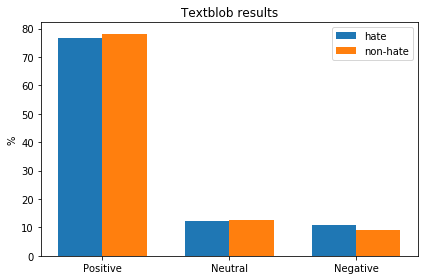

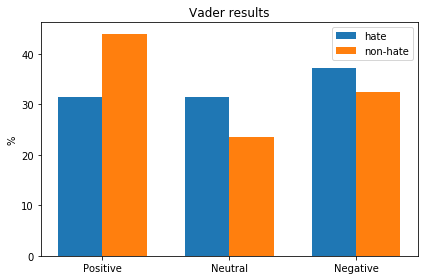

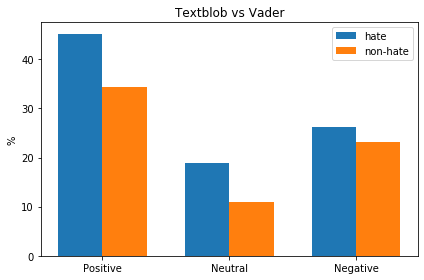

In [3]:
from teemu_task4 import textblob_tweets_polarity
from teemu_task4 import vader_tweets_polarity

textblob_results = textblob_tweets_polarity(labeled_tweets)
print("Textblob results are:")
print("The Percentage of negative hate:",textblob_results[0])
print("The percentage of neutral hate is:",textblob_results[1])
print("The percentage of positive hate is:",textblob_results[2])
print("The percentage of negative non hate is:",textblob_results[3])
print("The percentage of neutral non hate is:",textblob_results[4])
print("The percentage of positive non hate is:",textblob_results[5])

vader_results = vader_tweets_polarity(labeled_tweets)
print("\nVader results are:")
print("The Percentage of negative hate:",vader_results[0])
print("The percentage of neutral hate is: ",vader_results[1])
print("The percentage of positive hate is: ",vader_results[2])
print("The percentage of negative non hate is: ",vader_results[3])
print("The percentage of neutral non hate is: ",vader_results[4])
print("The percentage of positive non hate is: ",vader_results[5])

labels = ["Positive", "Neutral", "Negative"]
hate_values = [textblob_results[2], textblob_results[1], textblob_results[0]]
non_hate_values = [textblob_results[5], textblob_results[4], textblob_results[3]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hate_values, width, label="hate")
rects2 = ax.bar(x + width/2, non_hate_values, width, label="non-hate")

ax.set_ylabel("%")
ax.set_title("Textblob results")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
fig.savefig("Textblob")

labels = ["Positive", "Neutral", "Negative"]
hate_values = [vader_results[2], vader_results[1], vader_results[0]]
non_hate_values = [vader_results[5], vader_results[4], vader_results[3]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hate_values, width, label="hate")
rects2 = ax.bar(x + width/2, non_hate_values, width, label="non-hate")

ax.set_ylabel("%")
ax.set_title("Vader results")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
fig.savefig("Vader")

labels = ["Positive", "Neutral", "Negative"]
hate_values = [abs(textblob_results[2] - vader_results[2]), abs(textblob_results[1] - vader_results[1]), abs(textblob_results[0] - vader_results[0])]
non_hate_values = [abs(textblob_results[5] - vader_results[5]), abs(textblob_results[4] - vader_results[4]), abs(textblob_results[3] - vader_results[3])]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hate_values, width, label="hate")
rects2 = ax.bar(x + width/2, non_hate_values, width, label="non-hate")

ax.set_ylabel("%")
ax.set_title("Textblob vs Vader")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
fig.savefig("Textblob vs vader")




### Sentiment analysis results
Textblob results show that about 75 % off hate speech was positive and about 78% off non-hate speech was also positive and rest of the post divided evenly among neutral and negative. Surprising here is that according to textblob most of our hate speech would be positive hate speech and not negative what would be the logical solution because often hate speech is considered negative. Same is true on non-hate speech positive is to most common polarity but this is more reasonable because tweets that are not considered to be hate should be more on the positive side. 
Vader analyzer but most of our tweets in the extreme sections of the polarity so most of hate speech is negative hate and most of non-hate speech is in the positive category. Vader analyzing was also evenly distributed so that all categories were withing 20 % of each other’s values.  Last comparison was that we checked how many percentile units the two sentiment analyzers were of each other and maximum difference was with positive hate 45% and least different were neutral non-hate 11%

### 3.2 LIWC Features

To analyze the topics and categories common to hate and non hate speech we use the Empath library. Empath is an open source alternative to proprietary LIWC software. The library offers tools that can extract themes and topics from a given text. The library come with a default set of categories but new categories can be added by the users. We will use the default categories.

The following code uses the labeled tweet data set to extract the most common topics from the labeled tweet data sets. Each topic is then given a normalized score which is simply the number of mentions a topic has divided by the total number of tweets in the category.

Top 20 topics in hate tweets:
negative_emotion: 0.2847
hate: 0.2701
children: 0.219
family: 0.2117
love: 0.2044
youth: 0.1898
emotional: 0.1752
affection: 0.1752
kill: 0.1679
war: 0.1168
crime: 0.1168
appearance: 0.1168
speaking: 0.1095
fight: 0.1095
government: 0.1022
giving: 0.0949
disgust: 0.0949
communication: 0.0949
terrorism: 0.0876
leader: 0.0876

Top 20 topics in non hate tweets:
negative_emotion: 0.1713
war: 0.1573
fight: 0.1311
speaking: 0.1301
crime: 0.1264
communication: 0.1124
government: 0.1105
aggression: 0.1105
kill: 0.1067
politics: 0.0946
terrorism: 0.0927
weapon: 0.089
positive_emotion: 0.0871
violence: 0.0758
power: 0.074
business: 0.0712
giving: 0.0693
hate: 0.0684
law: 0.0665
leader: 0.0655


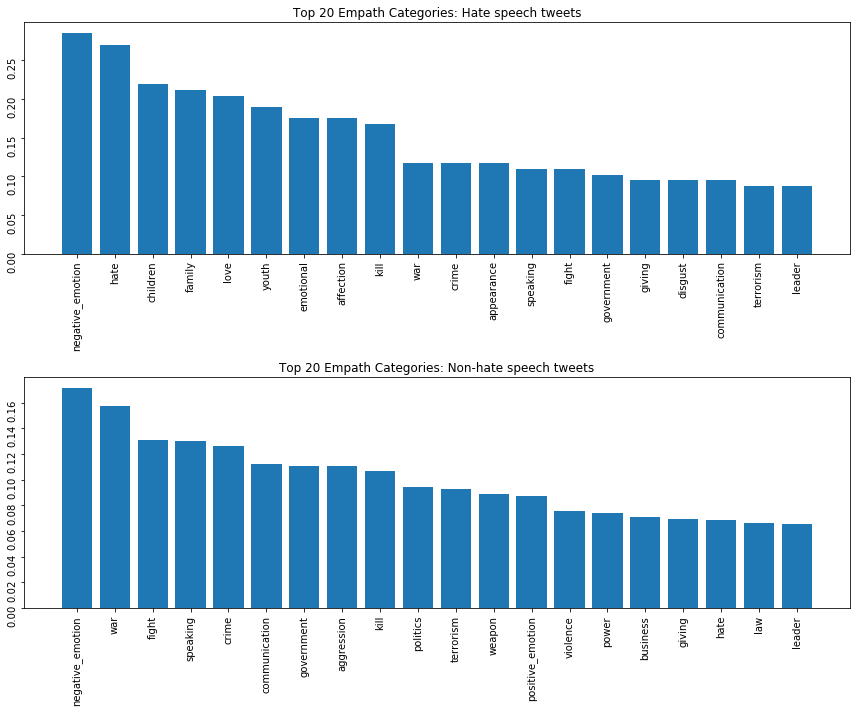

In [4]:
from liwc_empath import analyze_tweets_liwc

liwc_categories = analyze_tweets_liwc(labeled_tweets)

print("Top 20 topics in hate tweets:")
for i in range(20):
    print(liwc_categories[CATEGORY_HATE][i][0]+ ": " + str(round(liwc_categories[CATEGORY_HATE][i][1],4)))
    
print("\nTop 20 topics in non hate tweets:")
for i in range(20):
    print(liwc_categories[CATEGORY_NON_HATE][i][0]+ ": " + str(round(liwc_categories[CATEGORY_NON_HATE][i][1],4)))

# Draw top 20 categories    
categories_hate = [x for (x,y) in liwc_categories[CATEGORY_HATE][:20]]                                      
values_hate = [y for (x,y) in liwc_categories[CATEGORY_HATE][:20]]

categories_non_hate = [x for (x,y) in liwc_categories[CATEGORY_NON_HATE][:20]]                                     
values_non_hate = [y for (x,y) in liwc_categories[CATEGORY_NON_HATE][:20]]

fig, axs = plt.subplots(2,1,figsize=(12,10), sharey=False)

axs[0].bar(categories_hate, values_hate)
axs[0].set_title("Top 20 Empath Categories: Hate speech tweets")
axs[0].tick_params(labelrotation=90)

axs[1].bar(categories_non_hate, values_non_hate)
axs[1].set_title("Top 20 Empath Categories: Non-hate speech tweets")
axs[1].tick_params(labelrotation=90)

plt.tight_layout()
fig.savefig("liwc_topics")


Considering the hashtags that were used to collect the tweets, it is not suprising to find negative and violent topics are present in both data sets. The topic hate is more pronounced in the hate speech data set. Suprisingly, themes like children, family and love are some of the most common topics in the hate data set.

### 3.3 Emoticon usage
We will investigate the usage of emoticons in hate and non hate tweets by examining the types of emoticons used and their frequency. 

Emoticon usage in hate and non hate tweets:

Total number of tweets containing emoticons in hate speech tweets: 22 (16.06%)
Total number of tweets containing emoticons in non hate speech tweets: 154 (14.42%)

Emoticons in hate speech:
😂(:joy:): 5.11%
😡(:pout:): 4.38%
🇬🇧(:uk:): 1.46%
👍(:thumbsup:): 1.46%
😏(:smirk:): 1.46%
🙄(:roll_eyes:): 1.46%
💪(:muscle:): 1.46%
👏(:clap:): 1.46%
😊(:blush:): 1.46%
✌️(:v:): 0.73%
🛑(:stop_sign:): 0.73%
✡️(:star_of_david:): 0.73%
🎇(:sparkler:): 0.73%
🐍(:snake:): 0.73%
☠(:skull_and_crossbones:): 0.73%
💀(:skull:): 0.73%
👆(:point_up_2:): 0.73%
👇(:point_down:): 0.73%
😔(:pensive:): 0.73%
🕎(:menorah:): 0.73%
🇮🇱(:israel:): 0.73%
🎆(:fireworks:): 0.73%
😥(:disappointed_relieved:): 0.73%
💐(:bouquet:): 0.73%
💙(:blue_heart:): 0.73%

Emoticons in non hate speech:
🔚(:end:): 5.43%
🔔(:bell:): 5.43%
👉(:point_right:): 2.81%
😂(:joy:): 1.03%
👇(:point_down:): 0.66%
😉(:wink:): 0.56%
🔥(:fire:): 0.56%
🇺🇸(:us:): 0.47%
🇬🇧(:uk:): 0.47%
🤣(:rofl:): 0.47%
😡(:pout:): 0.47%
💪(:muscle:): 0.

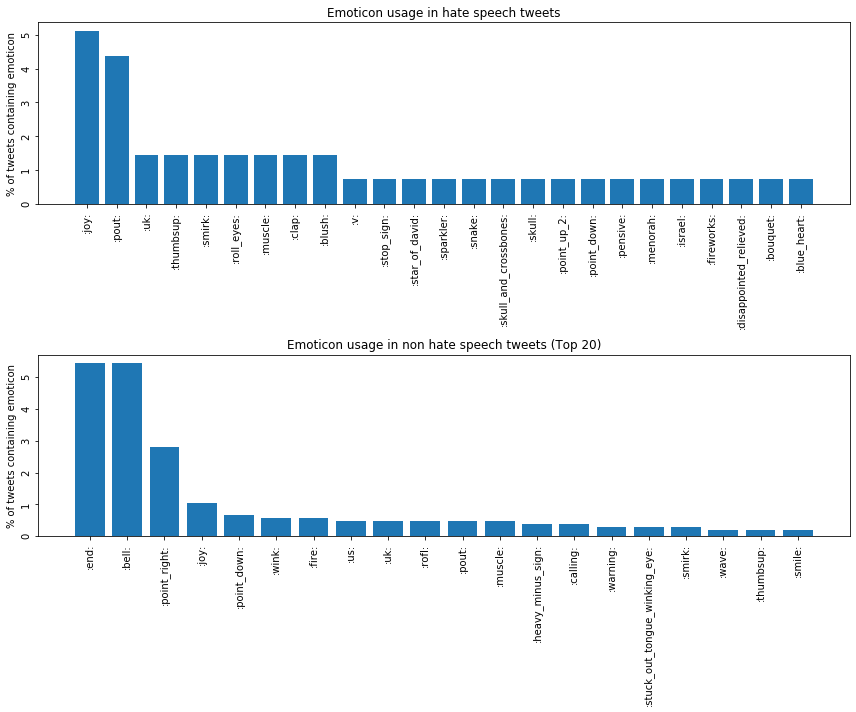

In [5]:
from count_emoticons import count_tweet_emoticons

# Retuns two lists containing the types of emoticons and their frequency in both hate and non hate categories
tweet_emoticons = count_tweet_emoticons(labeled_tweets)

print("Emoticon usage in hate and non hate tweets:\n")

print("Total number of tweets containing emoticons in hate speech tweets: {0:d} ({1:1.2f}%)".format(tweet_emoticons['hate_total'],tweet_emoticons['hate_total'] /num_hate * 100 ))
print("Total number of tweets containing emoticons in non hate speech tweets: {0:d} ({1:1.2f}%)".format(tweet_emoticons['non_hate_total'], tweet_emoticons['non_hate_total'] /num_non_hate * 100))
    
# Normalize emoticon counts by calculating the fraction of tweets containing
# each emoticon in both categories.
tweet_emoticons[CATEGORY_HATE] = [(x, y / num_hate) for x,y in tweet_emoticons[CATEGORY_HATE]]
tweet_emoticons[CATEGORY_NON_HATE] = [(x, y / num_non_hate) for x,y in tweet_emoticons[CATEGORY_NON_HATE]]   

print("\nEmoticons in hate speech:")
for emoticon in tweet_emoticons[CATEGORY_HATE]:
    print("{0}({1}): {2:1.2f}%".format(emojis.encode(emoticon[0]),emoticon[0], emoticon[1] * 100))

print("\nEmoticons in non hate speech:")
for emoticon in tweet_emoticons[CATEGORY_NON_HATE]:
    print("{0}({1}): {2:1.2f}%".format(emojis.encode(emoticon[0]),emoticon[0], emoticon[1] * 100))
    
emoticons_hate = [x for (x,y) in tweet_emoticons[CATEGORY_HATE]]
emoticons_percentage_hate = [y * 100 for (x,y) in tweet_emoticons[CATEGORY_HATE]]

emoticons_non_hate = [x for (x,y) in tweet_emoticons[CATEGORY_NON_HATE][:20]]
emoticons_percentage_non_hate = [y * 100 for (x,y) in tweet_emoticons[CATEGORY_NON_HATE][:20]]
        
fig, axs = plt.subplots(2,1,figsize=(12,10), sharey=False)
axs[0].bar(emoticons_hate, emoticons_percentage_hate)
axs[0].set_title("Emoticon usage in hate speech tweets")
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('% of tweets containing emoticon')
axs[1].bar(emoticons_non_hate, emoticons_percentage_non_hate )
axs[1].set_title("Emoticon usage in non hate speech tweets (Top 20)")
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('% of tweets containing emoticon')

plt.tight_layout()
fig.savefig("emoticons")


The hate speech tweets contained a total of 22 tweets which contained emoticons. The percentage of tweets containing emoticons was roughly the same in both categories.

The most common emoticons used in the hate speech, :joy: and :pout:,  don't really stand out and are frequently used in non hate context, although both seem to be more common in our hate speech data set. 

The two most common emoticons in the non hate speech data set were :exit: and :bell:. It turns out both emoticons were frequently used by opponents of Jeremy Corbyn, who were active during the British general election that occured in december, at the same time we were collection our data sets. 

### 3.4 Named entities
TEXT HERE

Top 20 named entities in hate tweets: 
UK:0.2409
Antisemitic:0.1168
Socialist:0.0876
2019:0.0803
ChairmanCorbyn:0.073
Nazis:0.0584
Nazi:0.0584
JeremyCorbyn:0.0584
Islamophobia:0.0584
London:0.0511
LabourParty:0.0511
Communist:0.0511
Terrorist:0.0438
Pakistan:0.0438
Jews:0.0438
ComradeCorbyn:0.0438
NeverCorbyn:0.0292
Labour:0.0292
ISIS:0.0292
GeneralElection2019:0.0292

Top 20 topics in non hate tweets:
Islamophobia: 0.1152
JeremyCorbyn: 0.0627
GeneralElection2019: 0.0599
Communist: 0.0599
India: 0.059
Lies: 0.0515
RSS: 0.0468
Twat: 0.044
UK: 0.0421
BJP: 0.0412
graffiti: 0.0403
EXTREMIST: 0.0393
HINDU: 0.0384
NeverCorbyn: 0.0365
Pakistan: 0.029
Labour: 0.029
US: 0.0281
Muslims: 0.0243
berlin: 0.0234
Muslim: 0.0234


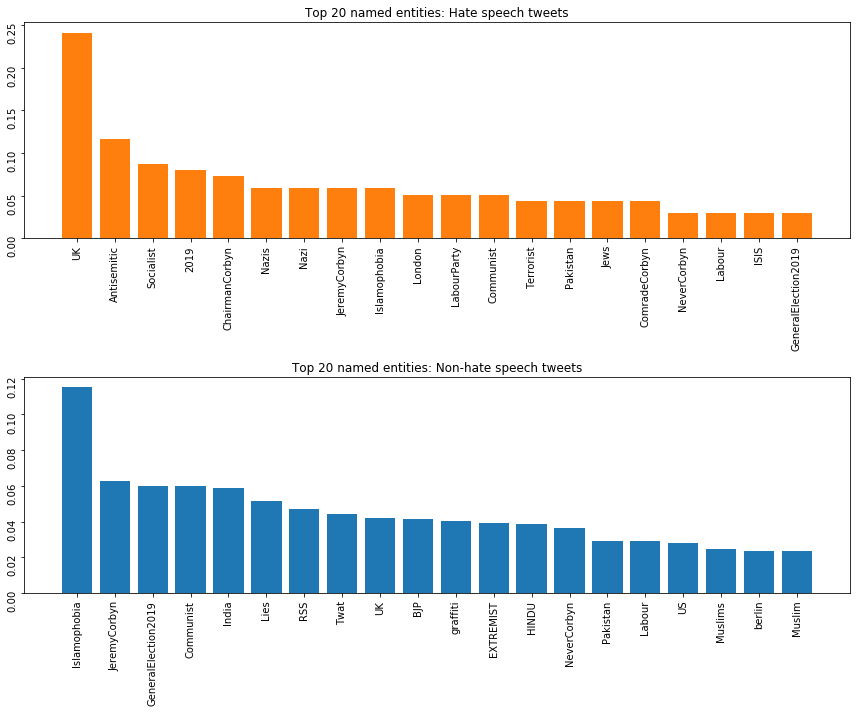

In [6]:
from named_entities import get_named_entities

entities = get_named_entities(labeled_tweets)

print("Top 20 named entities in hate tweets: ")
for i in range(20):
    print(entities[ENTITY_HATE][i][0]+ ":" + str(round(entities[ENTITY_HATE][i][1],4)))
    
print("\nTop 20 topics in non hate tweets:")
for i in range(20):
    print(entities[ENTITY_NON_HATE][i][0]+ ": " + str(round(entities[ENTITY_NON_HATE][i][1],4)))

# Draw top 20 entities
entities_hate = [x for (x,y) in entities[ENTITY_HATE][:20]]

freqs_hate = [y for (x,y) in entities[ENTITY_HATE][:20]]

entities_non_hate = [x for (x,y) in entities[ENTITY_NON_HATE][:20]]

freqs_non_hate = [y for (x,y) in entities[ENTITY_NON_HATE][:20]]

fig, axs = plt.subplots(2,1,figsize=(12,10), sharey=False)

axs[0].bar(entities_hate,freqs_hate)

axs[0].bar(entities_hate, freqs_hate)
axs[0].set_title("Top 20 named entities: Hate speech tweets")
axs[0].tick_params(labelrotation=90)

axs[1].bar(entities_non_hate,freqs_non_hate)
axs[1].set_title("Top 20 named entities: Non-hate speech tweets")
axs[1].tick_params(labelrotation=90)

plt.tight_layout()
fig.savefig("named entities")

### 3.5 Named phrases
TEXT HERE

## 4. Radicalization of active hate speakers

In this part we attempt to give active hate speech users a radicalization score.
We indentified three users, gathered a thousand tweets each,
and then gave the users the score based on some characteristics of these tweets.

AS: Sentiment is within the range [-1,1]. This range must be normalized to [0,1] to be used as intended in the radicalization score formula.
 
VN: The proportion of the posts that had a negative sentiment.

SN: The proportion of the posts that had a 'very negative' sentiment. If a posts standardized value is less than negative three, it was considered as 'very negative'.
Standardized value is acquired for each sentiment value using the following formula;
(z = (X - mean)/(standard_deviation), where X is the value in question,  and the standard deviation of the dataset that the value belongs to. Standardized values have a mean of 0 and a standard deviation of 1. This means that a standardized value of 3, for example, is three standard deviations away from the mean to the positive side.

DN: The duration, in number of days, between the oldest and newest tweet with a negative sentiment.

Radicalization: score = (K /AS^3) * (VN * SN * DN), where K = 1

file: ..\Data\tweets_user_UK_citizen.json
mean sentiment percentile: 0.5016298412698412
volume of negative posts: 0.22
volume of very negative posts:0.022
number of days active: 503
radicalization score: 19.28693665818726



file: ..\Data\tweets_user_Finnish_citizen.json
mean sentiment percentile: 0.5246912423383495
volume of negative posts: 0.218
volume of very negative posts:0.014
number of days active: 77
radicalization score: 1.626911047405512



file: ..\Data\tweets_user_White_supremacist.json
mean sentiment percentile: 0.5222739147067796
volume of negative posts: 0.279
volume of very negative posts:0.012
number of days active: 246
radicalization score: 5.78130059211096



examples of TextBlobs sentiments:
[tweet author] on Insane Zio War Planned Against Iran &amp; Venezuela – Also Why Dr. Slattery Endorses Tulsi!    -1.0
If Trump starts this catastrophic Zionist War with Iran it will be the greatest betrayal to his supporters and to America by any  U.S. President in history!    1

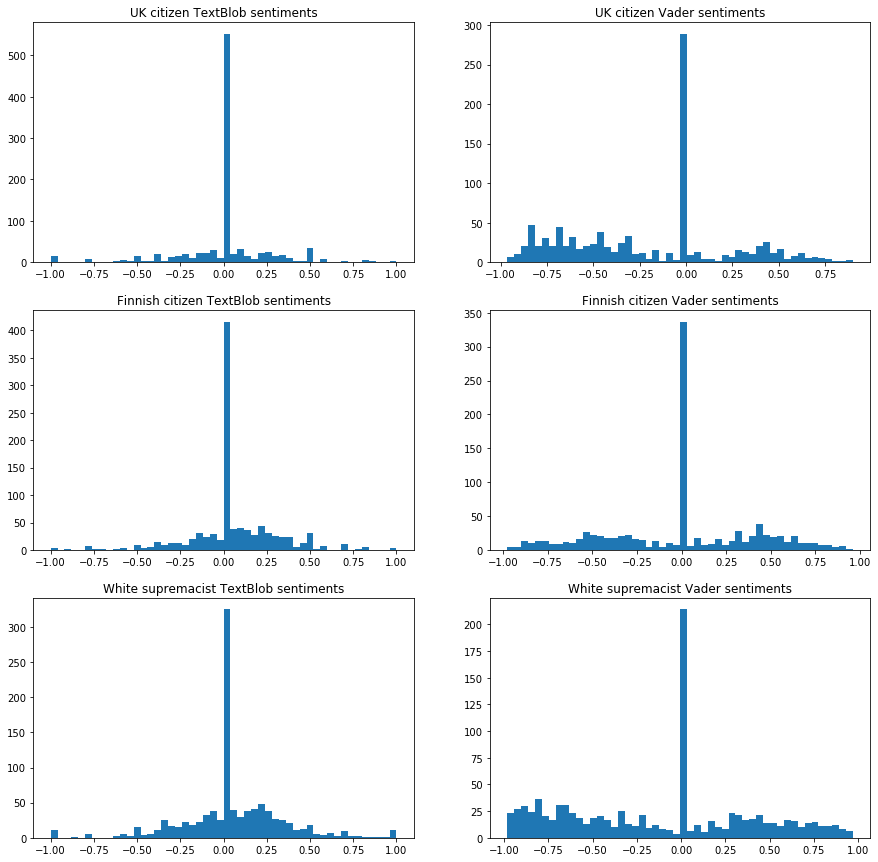

In [16]:
# CODE HERE
from analyse_user import analyse_users

first_user = analyse_users('..\\Data\\tweets_user_UK_citizen.json')
second_user = analyse_users('..\\Data\\tweets_user_Finnish_citizen.json')
third_user = analyse_users('..\\Data\\tweets_user_White_supremacist.json')


print('file: ' + first_user["source_file"])
print('mean sentiment percentile: ' + str(first_user["mean_sentiment_perc"]))
print('volume of negative posts: ' + str(first_user["vol_neg_posts"]))
print('volume of very negative posts:' + str(first_user["vol_very_neg_posts"]))
print('number of days active: '+ str(first_user["days_active"]))
print('radicalization score: '+ str(first_user["radicalization_score"]))
print('\n\n')
# print('very negative post and their sentiments:')
# [print(str(item[0]),item[1]) for item in first_user["very_neg_tweets_and_sentiments"]]

print('file: ' + second_user["source_file"])
print('mean sentiment percentile: ' + str(second_user["mean_sentiment_perc"]))
print('volume of negative posts: ' + str(second_user["vol_neg_posts"]))
print('volume of very negative posts:' + str(second_user["vol_very_neg_posts"]))
print('number of days active: '+ str(second_user["days_active"]))
print('radicalization score: '+ str(second_user["radicalization_score"]))
print('\n\n')
# print('very negative post and their sentiments:')
# [print(str(item[0]),item[1]) for item in second_user["very_neg_tweets_and_sentiments"]]


print('file: ' + third_user["source_file"])
print('mean sentiment percentile: ' + str(third_user["mean_sentiment_perc"]))
print('volume of negative posts: ' + str(third_user["vol_neg_posts"]))
print('volume of very negative posts:' + str(third_user["vol_very_neg_posts"]))
print('number of days active: '+ str(third_user["days_active"]))
print('radicalization score: '+ str(third_user["radicalization_score"]))
print('\n\n')
# print('very negative post and their sentiments:')
# [print(str(item[0]),item[1]) for item in third_user["very_neg_tweets_and_sentiments"]]

print("examples of TextBlobs sentiments:")

print("[tweet author] on Insane Zio War Planned Against Iran &amp; Venezuela – Also Why Dr. Slattery Endorses Tulsi!    -1.0")
print("If Trump starts this catastrophic Zionist War with Iran it will be the greatest betrayal to his supporters and to America by any  U.S. President in history!    1.0")

print('"Indications" of Iran launching attacks on America to commit national suicide by inviting total destruction by the USA Ziocons! Not a single word in the Igor (Zio Disney) ABC News. which is run by Super Zionist James Goldston.  Only "indications" are TOTAL ZIO CONTROL of MEDIA!    0.0738095238095238')
print('\n\n')
print("TextBLobs and sentimentVaders sentiment scores histograms:")

fig, axs = plt.subplots(3, 2,figsize=(15,15))
# first_df_blob = pd.DataFrame(first_user["sentiments"], columns = ['UK citizen sentiment'])
axs[0,0].hist(first_user['sentiments'] ,bins=50)
axs[0,0].set_title('UK citizen TextBlob sentiments')

# second_df_blob = pd.DataFrame(second_user["sentiments"], columns = ['Finnish citizen sentiment'])
axs[1,0].hist(second_user['sentiments'] ,bins=50)
axs[1,0].set_title('Finnish citizen TextBlob sentiments')

# third_df_blob = pd.DataFrame(third_user["sentiments"], columns = ['White supremacist sentiment '])
axs[2,0].hist(third_user['sentiments'] ,bins=50)
axs[2,0].set_title('White supremacist TextBlob sentiments')

# first_df_vader = pd.DataFrame(first_user["vader_sentiments"], columns = ['UK citizen sentiment'])
axs[0,1].hist(first_user['vader_sentiments'] ,bins=50)
axs[0,1].set_title('UK citizen Vader sentiments')

# second_df_vader = pd.DataFrame(second_user["vader_sentiments"], columns = ['Finnish citizen sentiment'])
axs[1,1].hist(second_user['vader_sentiments'] ,bins=50)
axs[1,1].set_title('Finnish citizen Vader sentiments')

# third_df_vader = pd.DataFrame(third_user["vader_sentiments"], columns = ['White supremacist sentiment '])
axs[2,1].hist(third_user['vader_sentiments'] ,bins=50)
axs[2,1].set_title('White supremacist Vader sentiments')

# plt.tight_layout()
plt.plot()
plt.show()

# conclusions

We experimented with several different methods in order to ﬁnd features for identifying hate speech. The approaches employing sentiment analysis did not work as well as we predicted in distinguishing between normal speech and hate speech. Other methods of sentiment analysis might prove more effective.

The Empath topics showed a clear distinction between the hate and non-hate data sets. Feature vector constructed from the topics most common to hate speech could be employed for training a model to recognize hate speech. Named entities could also be used though training the model might be harder since trending entities are so time dependent. Emoticon usage, if evaluated purely as the types of emoticons used, did not seem particularly effective in distinguishing hate speech. Combining emoticon analysis with other methods might provide better results.

It is hard to gauge how well the calculated radicalization scores reﬂects the actual radicalization of the subjects. Further more our analysis might have suffered from the poor performance of the Texblob sentiment analysis. More effort should be spent in the future in order to validate the metric. Alternative tools for sentiment analysis should also be considered.